In [2]:
%%bash
pip install numpy scipy scikit-image matplotlib

In [1]:
import torch
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')
ssd_model.to('cuda')
ssd_model.eval()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [2]:
pip install torch torchvision

In [2]:
pip install pytesseract


In [3]:
!apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,776 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [4]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [38]:
pip install easyocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn

Text within outer bounding box: ig, fh
I ’ Mint

Text within license plate bounding box: 


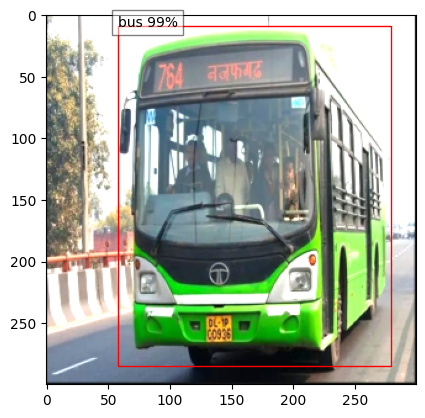

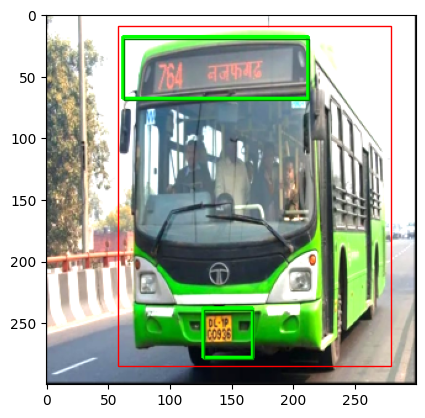

In [5]:
import torch
import cv2
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pytesseract
import numpy as np

# Load the pre-trained NVIDIA SSD model
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

# Check the available GPUs and select the desired one (e.g., T4)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ssd_model = ssd_model.to(device)

# Set the model to evaluation mode
ssd_model.eval()

# Read the bus image
image_path = "/content/bus.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess the image
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
])
input_tensor = transform(image_rgb).unsqueeze(0)

# Move the input tensor to the selected device (GPU)
input_tensor = input_tensor.to(device)

# Perform object detection
with torch.no_grad():
    detections_batch = ssd_model(input_tensor)

results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

classes_to_labels = utils.get_coco_object_dictionary()

# Display the results
for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized and brighter image...
    image = np.transpose(input_tensor[image_idx].cpu().numpy(), (1, 2, 0))
    image = np.clip(image * 1.5, 0, 1)  # Make the image brighter
    image = (image * 255).astype(np.uint8)  # Convert to 8-bit integer
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]

    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]

        # Filter detections based on confidence
        confidence_threshold = 0.40
        if confidences[idx] >= confidence_threshold:
            # Draw the outer bounding box
            outer_rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(outer_rect)
            label = classes_to_labels[classes[idx] - 1]
            ax.text(x, y, "{} {:.0f}%".format(label, confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))

            # Extract text within the outer bounding box using OCR
            roi_outer = image[int(y):int(y+h), int(x):int(x+w)]
            text_outer = pytesseract.image_to_string(roi_outer, config='--psm 6')  # --psm 6 for treating the image as a block of text
            print(f"Text within outer bounding box: {text_outer}")

            # Assuming license plate coordinates relative to the outer bounding box
            x_lp_relative, y_lp_relative, w_lp, h_lp = 5, 10,150, 50
            x_lp2_relative, y_lp2_relative, w_lp2, h_lp2 = 70, 230,40, 40
            # Convert relative coordinates to absolute coordinates based on the outer bounding box
            x_lp_absolute = x + x_lp_relative
            y_lp_absolute = y + y_lp_relative
            x_lp2_absolute = x + x_lp2_relative
            y_lp2_absolute = y + y_lp2_relative

            # Convert the image to cv::UMat
            image_umat = cv2.UMat(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))



            # Draw bounding box around the license plate on the original image
            cv2.rectangle(image_umat, (int(x_lp_absolute), int(y_lp_absolute)), (int(x_lp_absolute + w_lp), int(y_lp_absolute + h_lp)), (0, 255, 0), 2)
            cv2.rectangle(image_umat, (int(x_lp2_absolute), int(y_lp2_absolute)), (int(x_lp2_absolute + w_lp2), int(y_lp2_absolute + h_lp2)), (0, 255, 0), 2)

            # Display the image with both outer and license plate bounding boxes
            fig, ax = plt.subplots(1)
            ax.imshow(cv2.cvtColor(image_umat.get(), cv2.COLOR_BGR2RGB))

            # Draw the outer bounding box
            outer_rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(outer_rect)

            # Draw the license plate bounding box
            lp_rect = patches.Rectangle((x_lp_absolute, y_lp_absolute), w_lp, h_lp, linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(lp_rect)

            # Draw the license plate bounding box
            lp2_rect = patches.Rectangle((x_lp2_absolute, y_lp2_absolute), w_lp2, h_lp2, linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(lp2_rect)

            roi_lp = image[int(y_lp_absolute):int(y_lp_absolute + h_lp), int(x_lp_absolute):int(x_lp_absolute + w_lp)]
            text_lp = pytesseract.image_to_string(roi_lp, config='--psm 6 --oem 3 -l hin+eng')
            print(f"Text within license plate bounding box: {text_lp}")


            plt.show()



From Main function
/content/bus.jpg
The threshold valua applied to the image is: 140.0 


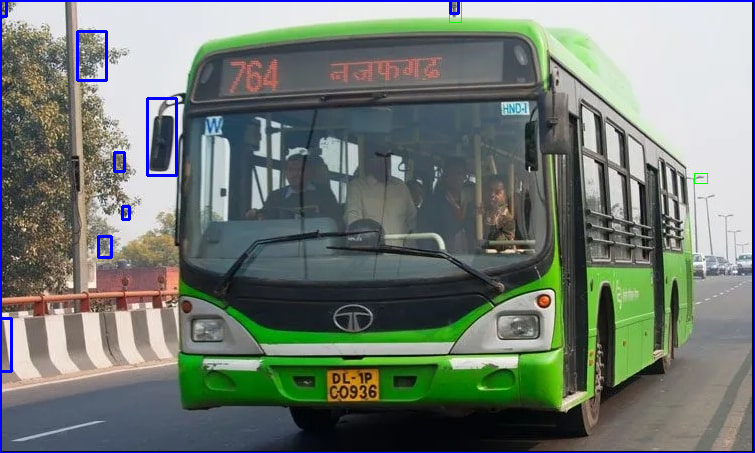

In [53]:
import cv2
from google.colab.patches import cv2_imshow
import glob
from pre_processing import preProcessing

jpgImages = glob.glob("/content/bus.jpg")

def main():
    print("From Main function")
    # JPG Images
    for jpg in jpgImages:
        print(jpg)
        image = cv2.imread(jpg)
        returnImage = preProcessing(image)
        cv2_imshow(returnImage)
        cv2.waitKey(0)  # Wait for any key press

main()


Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


From Main function
/content/bus.jpg
Text within outer bounding box: ig, fh
I ’ Mint

Text within license plate bounding box: 
Text within inner bounding box: —



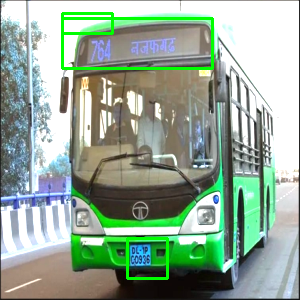

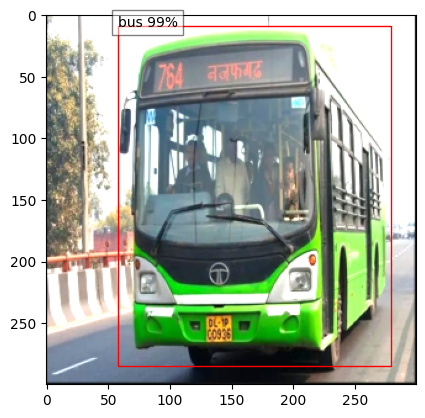

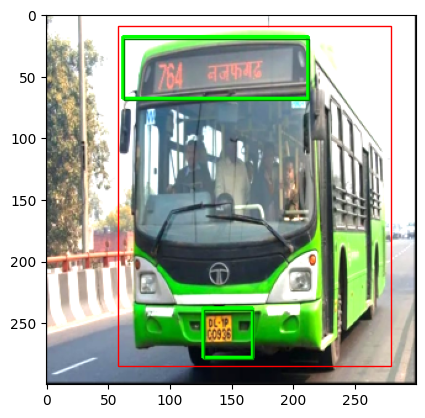

In [6]:
import torch
import cv2
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow
import glob

# Load the pre-trained NVIDIA SSD model
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

# Check the available GPUs and select the desired one (e.g., T4)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ssd_model = ssd_model.to(device)

# Set the model to evaluation mode
ssd_model.eval()

def process_inner_boxes(image, outer_bbox, inner_bbox_relative, text_config='--psm 6 --oem 3 -l hin+eng'):
    x_outer, y_outer, w_outer, h_outer = outer_bbox
    x_inner_relative, y_inner_relative, w_inner, h_inner = inner_bbox_relative

    x_inner_absolute = x_outer + x_inner_relative
    y_inner_absolute = y_outer + y_inner_relative

    image_umat = cv2.UMat(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    cv2.rectangle(image_umat, (int(x_inner_absolute), int(y_inner_absolute)),
                  (int(x_inner_absolute + w_inner), int(y_inner_absolute + h_inner)), (0, 255, 0), 2)

    roi_inner = image[int(y_inner_absolute):int(y_inner_absolute + h_inner), int(x_inner_absolute):int(x_inner_absolute + w_inner)]
    text_inner = pytesseract.image_to_string(roi_inner, config=text_config)
    print(f"Text within inner bounding box: {text_inner}")

    return image_umat.get()

def preProcessing(image):

    # Display the results
    for image_idx in range(len(best_results_per_input)):
        fig, ax = plt.subplots(1)
        image = np.transpose(input_tensor[image_idx].cpu().numpy(), (1, 2, 0))
        image = np.clip(image * 1.5, 0, 1)  # Make the image brighter
        image = (image * 255).astype(np.uint8)
        ax.imshow(image)

        bboxes, classes, confidences = best_results_per_input[image_idx]

        for idx in range(len(bboxes)):
            left, bot, right, top = bboxes[idx]
            x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]

            confidence_threshold = 0.40
            if confidences[idx] >= confidence_threshold:
                outer_rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(outer_rect)
                label = classes_to_labels[classes[idx] - 1]
                ax.text(x, y, "{} {:.0f}%".format(label, confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))

                roi_outer = image[int(y):int(y+h), int(x):int(x+w)]
                text_outer = pytesseract.image_to_string(roi_outer, config='--psm 6')
                print(f"Text within outer bounding box: {text_outer}")

                x_lp_relative, y_lp_relative, w_lp, h_lp = 5, 10, 150, 50
                x_lp2_relative, y_lp2_relative, w_lp2, h_lp2 = 70, 230, 40, 40
                x_lp_absolute = x + x_lp_relative
                y_lp_absolute = y + y_lp_relative
                x_lp2_absolute = x + x_lp2_relative
                y_lp2_absolute = y + y_lp2_relative

                image_umat = cv2.UMat(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

                cv2.rectangle(image_umat, (int(x_lp_absolute), int(y_lp_absolute)),
                              (int(x_lp_absolute + w_lp), int(y_lp_absolute + h_lp)), (0, 255, 0), 2)
                cv2.rectangle(image_umat, (int(x_lp2_absolute), int(y_lp2_absolute)),
                              (int(x_lp2_absolute + w_lp2), int(y_lp2_absolute + h_lp2)), (0, 255, 0), 2)

                fig, ax = plt.subplots(1)
                ax.imshow(cv2.cvtColor(image_umat.get(), cv2.COLOR_BGR2RGB))
                outer_rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(outer_rect)
                lp_rect = patches.Rectangle((x_lp_absolute, y_lp_absolute), w_lp, h_lp, linewidth=1, edgecolor='g', facecolor='none')
                ax.add_patch(lp_rect)
                lp2_rect = patches.Rectangle((x_lp2_absolute, y_lp2_absolute), w_lp2, h_lp2, linewidth=1,
                                             edgecolor='g', facecolor='none')
                ax.add_patch(lp2_rect)

                roi_lp = image[int(y_lp_absolute):int(y_lp_absolute + h_lp), int(x_lp_absolute):int(x_lp_absolute + w_lp)]
                text_lp = pytesseract.image_to_string(roi_lp, config='--psm 6 --oem 3 -l hin+eng')
                print(f"Text within license plate bounding box: {text_lp}")

                # Process inner bounding boxes
                inner_bbox_relative = (5, 5, 50, 20)  # Adjust these values as needed
                image_umat = process_inner_boxes(image_umat.get(), (x, y, w, h), inner_bbox_relative)

                cv2_imshow(image_umat)
                cv2.waitKey(0)  # Wait for any key press
                plt.show()

def main():
    print("From Main function")
    jpgImages = glob.glob("/content/bus.jpg")

    # JPG Images
    for jpg in jpgImages:
        print(jpg)
        image = cv2.imread(jpg)
        preProcessing(image)

main()


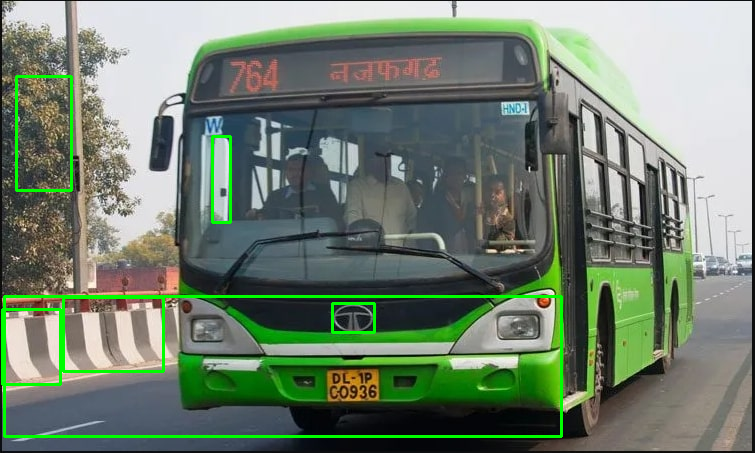

In [20]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = "bus.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help with edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to find potential license plates
min_area = 500
potential_plates = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw bounding boxes around potential license plates
for plate_contour in potential_plates:
    x, y, w, h = cv2.boundingRect(plate_contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the original image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


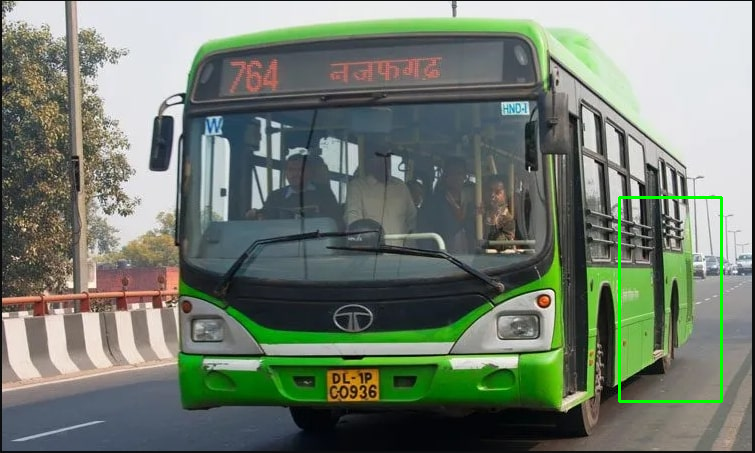

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image_path = "bus.jpg"
image = cv2.imread(image_path)

# Initialize the HOG descriptor
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Perform pedestrian detection
boxes, weights = hog.detectMultiScale(image, winStride=(8, 8), padding=(4, 4), scale=1.05)

# Draw bounding boxes on the image
for (x, y, w, h) in boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


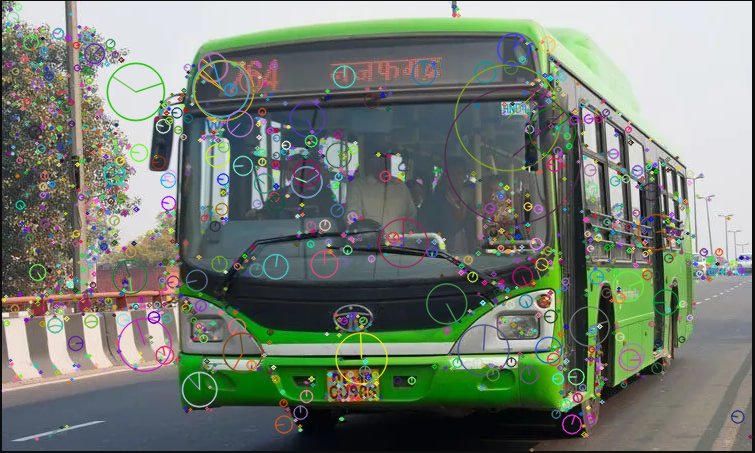

In [22]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image_path = "bus.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect key points and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw key points on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with key points
cv2_imshow(image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()
